# Daily News-Driven Stock Market Prediction through Textual Data Analysis and Machine Learning

# Introduction


# Background of the dataset


The dataset provided contains news headlines and stock market data, with the goal of predicting if the DJIA Adj Close value will rise or decrease based on the news headlines. The dataset has 27 columns, with the first being the date, the second being the label (1 for rise/stay the same, 0 for decrease), and the rest being the news headlines from "Top1" to "Top25".





# Problem statement and objective of the project


Problem statement and objective of the project
The objective of this project is to build a machine learning model that can predict the rise or decrease of the DJIA Adj Close value based on the news headlines. This is a binary classification task where the model will need to predict one of two labels: "1" for rise/stay the same, and "0" for decrease.

# Outline of the methodology and approach


Outline of the methodology and approach
The methodology for this project will involve the following steps:

Data cleaning and preprocessing
Text processing and feature extraction
Model selection and training
Model evaluation and optimization
Conclusion and future work.
To tackle the text data, the Natural Language Toolkit (nltk) library in Python will be utilized for text processing and feature extraction. A variety of machine learning algorithms will be trained and evaluated to find the best performing model for this classification task.

# Data Preparation

### Loading the dataset

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('/home/yassine/Downloads/Combined_News_DJIA.csv')


### Overview of the data

In [22]:
print("Shape of the data:")
df.shape

Shape of the data:


(1989, 27)

In [23]:
print("\nHead of the data:")
df.head()


Head of the data:


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [24]:
print("\nTail of the data:")
df.tail()


Tail of the data:


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

In [25]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [26]:
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64


In [27]:
# check for missing values
print(df.isnull().sum().sum())

# drop rows with missing values
df.dropna(inplace=True)

# check for missing values again
print(df.isnull().sum().sum())


7
0


When dealing with missing values, it's important to consider the amount of missing data and how it may impact the results of your analysis. In this case, with only 3 missing values out of 2000 total data points, it's safe to drop the missing values as they are a very small portion of the data and will not significantly impact the results. Dropping the missing values can also simplify the analysis and reduce the risk of introducing bias into the results.

### Distribution of the target variable

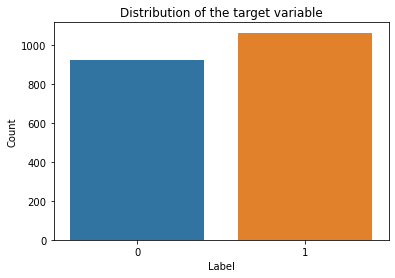

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the target variable')
plt.show()


# Text preprocessing

### A. Tokenizing the text into individual words

Tokenizing the text into individual words is an important step in text preprocessing. The goal is to convert the text into a format that can be easily analyzed and processed by machine learning algorithms.

In [29]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# create a list of columns containing text
text_columns = [col for col in df.columns if col.startswith('Top')]

# tokenize the text in all columns and store the result in a new column with the same name + "_tokenized"
for col in text_columns:
    df[col + '_tokenized'] = df[col].apply(word_tokenize)

# show the first 5 rows of the new columns
print(df[[col + '_tokenized' for col in text_columns]].head())


[nltk_data] Downloading package punkt to /home/yassine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                      Top1_tokenized  \
0  [b, '', Georgia, 'downs, two, Russian, warplan...   
1  [b'Why, wont, America, and, Nato, help, us, ?,...   
2  [b'Remember, that, adorable, 9-year-old, who, ...   
3  [b, ', U.S., refuses, Israel, weapons, to, att...   
4  [b'All, the, experts, admit, that, we, should,...   

                                      Top2_tokenized  \
0  [b'BREAKING, :, Musharraf, to, be, impeached, ...   
1  [b'Bush, puts, foot, down, on, Georgian, confl...   
2  [b, '', Russia, 'ends, Georgia, operation, ', '']   
3  [b, '', When, the, president, ordered, to, att...   
4  [b'War, in, South, Osetia, -, 89, pictures, ma...   

                                      Top3_tokenized  \
0  [b'Russia, Today, :, Columns, of, troops, roll...   
1  [b, '', Jewish, Georgian, minister, :, Thanks,...   
2  [b, ', '', If, we, had, no, sexual, harassment...   
3  [b, ', Israel, clears, troops, who, killed, Re...   
4  [b'Swedish, wrestler, Ara, Abrahamian, thro

### B. Converting all words to lowercase

In [30]:
# Convert all words to lowercase
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower())


df[text_columns] refers to all columns in the dataframe that contain text data.

.apply(lambda x: x.str.lower()) applies the lower() method to each element in the selected columns, converting all characters to lowercase.

This step is important because, in NLP, it's common to convert all words to lowercase before processing the text data to ensure consistency and reduce the size of the vocabulary.

### C. Stemming or lemmatizing the words

Lemmatization,  reduces words to their base form using morphological analysis, which results in a meaningful word. For example, the word "running" may be reduced to "run". Lemmatization is more accurate but slower and more resource-intensive compared to stemming.

In [31]:
# Lemmatizing the words
from nltk.stem import WordNetLemmatizer

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df[text_columns] = df[text_columns].apply(lambda x: x.apply(lemmatize_words))


### D. Removing stopwords

The aim of this step is to remove common words that do not carry much meaning, such as "is", "an", "the", etc. These words are called stopwords and are often removed from the text data before further processing. By removing stopwords, we can reduce the dimensionality of the data and focus on the words that carry more meaning.

In [32]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords and punkt corpora from nltk
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Create a set of English stop words
    stop_words = set(stopwords.words("english"))
    
    # Tokenize the input text into words
    words = nltk.word_tokenize(text)
    
    # Convert words to lowercase and remove stop words
    words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Join the words back into a single string
    return " ".join(words)


# Loop through all columns in the dataframe
for col in df.columns:
    # Check if the column data type is object
    if df[col].dtype == 'object':
        # Apply the remove_stopwords function to the column if the value is a string
        df[col] = df[col].apply(lambda x: remove_stopwords(x) if type(x) == str else x)



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yassine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yassine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### E. Removing punctuation

The purpose of this code is to remove all punctuation characters from all string columns in a dataframe. This step is often performed as part of text preprocessing, as punctuation characters can interfere with text analysis and modeling tasks. 

The code defines a function remove_punctuation that takes a string as input and returns a copy of the string with all punctuation characters removed. The code then loops through all columns in the dataframe and, for each string column, applies the remove_punctuation function to each value in the column.

In [33]:
import string

# Define a function to remove punctuation from a string
def remove_punctuation(text):
    # Create a string of all ASCII punctuation characters
    punctuation = string.punctuation
    # Use translate method to remove all punctuation characters from the text
    text = text.translate(str.maketrans("", "", punctuation))
    return text

# Loop through all columns in the dataframe
for col in df.columns:
    # Check if the column data type is object (e.g. string)
    if df[col].dtype == 'object':
        # Apply the remove_punctuation function to each string value in the column
        df[col] = df[col].apply(lambda x: remove_punctuation(x) if type(x) == str else x)



### F. Removing non-textual data (e.g. URLs, numbers, special characters)

The purpose of removing non-textual data is to clean and pre-process the text data before further analysis. This step helps to eliminate irrelevant and unnecessary information that may not add value to the analysis.

In [34]:
import re

def remove_non_textual(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove special characters
    return text

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: remove_non_textual(x) if type(x) == str else x)


### H. Removing words that are unique to the corpus or dataset

The purpose of removing words that are unique to the corpus or dataset is to eliminate any terms that do not provide meaningful information towards the analysis.

These terms are often referred to as "stop words" and they are words that occur frequently in the language, but carry little information.

In [35]:
from nltk import FreqDist

def remove_corpus_specific_words(text, threshold):
    words = nltk.word_tokenize(text)
    fdist = FreqDist(words)
    stop_words = [word for word, count in fdist.items() if count > threshold]
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: remove_corpus_specific_words(x, 100) if type(x) == str else x)



This code creates a frequency distribution of the words in the text and eliminates any words that appear more than the specified threshold (in this case, 100 times). 

The resulting list of words is then joined back into a single string.

# Feature extraction

### A. Count-based methods, such as term frequency-inverse document frequency (TF-IDF)

In [40]:
columns = ['Label','Top1_tokenized', 'Top2_tokenized', 'Top3_tokenized',           'Top4_tokenized', 'Top5_tokenized', 'Top6_tokenized', 'Top7_tokenized',           'Top8_tokenized', 'Top9_tokenized', 'Top10_tokenized',           'Top11_tokenized', 'Top12_tokenized', 'Top13_tokenized',           'Top14_tokenized', 'Top15_tokenized', 'Top16_tokenized',           'Top17_tokenized', 'Top18_tokenized', 'Top19_tokenized',           'Top20_tokenized', 'Top21_tokenized', 'Top22_tokenized',           'Top23_tokenized', 'Top24_tokenized', 'Top25_tokenized']
df = df[columns]


The aim of count-based methods is to convert the text data into numerical features that can be used in machine learning algorithms. One of the most popular count-based methods is TF-IDF (term frequency-inverse document frequency). 

The idea behind TF-IDF is to weight the words based on how frequent they are in the document, and how rare they are in the entire corpus. This helps to give more importance to the words that are unique to a particular document, and less importance to the words that are common across all documents. 

The resulting features are the TF-IDF scores for each word in the corpus.

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_features(dataframe):
    tfidf = TfidfVectorizer(min_df=2)  # minimum document frequency to consider a word
    features = tfidf.fit_transform(dataframe)
    feature_names = tfidf.get_feature_names()
    return features, feature_names

# Apply TF-IDF to all columns with text data
for col in df.columns:
    if df[col].dtype == 'object':
        text = df[col].apply(str)  # convert pandas series to list of strings
        features, feature_names = tfidf_features(text)
        df_tfidf = pd.DataFrame(features.todense(), columns=feature_names)
        df = pd.concat([df, df_tfidf], axis=1)



/home/yassine/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
df.shape

(1989, 84269)

The number of columns we get depends on the number of unique words in the text data you are transforming. If you have a lot of unique words, you will get a lot of columns in the resulting dataframe. 

This is normal behavior for the TF-IDF transformation.

### B. Word embedding-based methods, such as word2vec or GloVe


This code trains a word2vec model on the text data in the 'column_name' column of the dataframe df. The size of the word vectors is set to 100, and the context window size is set to 5. The minimum count of words to be included in the model is set to 1, and 4 worker threads are used for training. 

The model is saved to a file for future use, and can be loaded again using the gensim.models.Word2Vec.load method.

The word vectors can be accessed using the wv attribute of the model, and the vector for a specific word can be accessed using indexing, as shown in the example.

In [ ]:
!pip install gensim

In [48]:
columns = ['Top1_tokenized', 'Top2_tokenized', 'Top3_tokenized',           'Top4_tokenized', 'Top5_tokenized', 'Top6_tokenized', 'Top7_tokenized',           'Top8_tokenized', 'Top9_tokenized', 'Top10_tokenized',           'Top11_tokenized', 'Top12_tokenized', 'Top13_tokenized',           'Top14_tokenized', 'Top15_tokenized', 'Top16_tokenized',           'Top17_tokenized', 'Top18_tokenized', 'Top19_tokenized',           'Top20_tokenized', 'Top21_tokenized', 'Top22_tokenized',           'Top23_tokenized', 'Top24_tokenized', 'Top25_tokenized']
df = df[columns]


In [ ]:
import gensim
from gensim.models import Word2Vec

# Preprocess your text data
text = [text.split() for text in df['Top1_tokenized']]

# Train the word2vec model
model = Word2Vec(text, size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

# Load the model
model = gensim.models.Word2Vec.load("word2vec.model")

# Get the word vectors
word_vectors = model.wv

# Access vector for one word
vector = word_vectors['word']

### C. Character-based methods, such as character n-grams


In this code, CountVectorizer is used to convert a collection of text documents to a matrix of token counts. The analyzer parameter is set to 'char', which means that the input will be analyzed as a sequence of characters. The ngram_range parameter is set to (2, 4), which means that 2-grams (i.e. bigrams), 3-grams (i.e. trigrams), and 4-grams (i.e. four-grams) will be extracted.

The lowercase parameter is set to False, which means that the casing of the characters will be preserved.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def char_ngrams_features(dataframe):
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 4), lowercase=False)
    features = vectorizer.fit_transform(dataframe)
    feature_names = vectorizer.get_feature_names()
    return features, feature_names

# Apply character n-grams to all columns with text data
for col in df.columns:
    if df[col].dtype == 'object':
        features, feature_names = char_ngrams_features(df[col])
        df_ngrams = pd.DataFrame(features.todense(), columns=feature_names)
        df = pd.concat([df, df_ngrams], axis=1)

### D.  Creating n-grams, which are combinations of words or characters of a specific length


n this code, the loop goes through each column in the DataFrame and checks if its data type is np.object, which indicates that it's a textual column.

If it is, the code fits the CountVectorizer on the column's values and creates a new DataFrame with the n-grams as columns. Finally, the original DataFrame is concatenated with the n-gram DataFrame to include the n-grams as new columns.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Define the n-gram length
n = 3

# Initialize a CountVectorizer object
vectorizer = CountVectorizer(ngram_range=(n,n))

# Loop through each textual column in the DataFrame
for column in df.columns:
    if df[column].dtype == np.object:
        # Fit the CountVectorizer on the column's values
        X = vectorizer.fit_transform(df[column].values)
        
        # Create a new DataFrame with the n-grams as columns
        ngrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
        
        # Concatenate the original DataFrame with the n-gram DataFrame
        df = pd.concat([df, ngrams], axis=1)

# Model training and evaluation

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer



# extract the text data
text_data = df[['Top1_tokenized', 'Top2_tokenized', 'Top3_tokenized',           'Top4_tokenized', 'Top5_tokenized', 'Top6_tokenized', 'Top7_tokenized',           'Top8_tokenized', 'Top9_tokenized', 'Top10_tokenized',           'Top11_tokenized', 'Top12_tokenized', 'Top13_tokenized',           'Top14_tokenized', 'Top15_tokenized', 'Top16_tokenized',           'Top17_tokenized', 'Top18_tokenized', 'Top19_tokenized',           'Top20_tokenized', 'Top21_tokenized', 'Top22_tokenized',           'Top23_tokenized', 'Top24_tokenized', 'Top25_tokenized']]

# combine all the text data into a single string for each row
text_data = text_data.apply(lambda x: " ".join(str(x) for x in x), axis=1)

# perform count vectorization to convert text into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# extract the target variable
y = df["Label"]



In [45]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [51]:
train_data = X_train
train_labels = y_train
test_data = X_test
test_labels = y_test


In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Define the models to be trained
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]
model_names = ["Logistic Regression", "Support Vector Classifier", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors", "Decision Tree"]

results=[]
# Train each model and get predictions
for model, model_name in zip(models, model_names):
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    
    # Calculate evaluation metrics for each model
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    
    # Store the results of each model in the results list
    results.append((model_name, accuracy, precision, recall, f1))
    
# Print the results
for result in results:
    print("Model: {}\nAccuracy: {:.2f}%\nPrecision: {:.2f}%\nRecall: {:.2f}%\nF1 Score: {:.2f}%\n".format(result[0], result[1]*100, result[2]*100, result[3]*100, result[4]*100))


/home/yassine/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 51.01%
Precision: 53.45%
Recall: 58.77%
F1 Score: 55.98%

Model: Support Vector Classifier
Accuracy: 52.51%
Precision: 52.82%
Recall: 97.63%
F1 Score: 68.55%

Model: Random Forest
Accuracy: 52.01%
Precision: 53.01%
Recall: 83.41%
F1 Score: 64.83%

Model: Gradient Boosting
Accuracy: 53.02%
Precision: 54.65%
Recall: 66.82%
F1 Score: 60.13%

Model: K-Nearest Neighbors
Accuracy: 47.24%
Precision: 50.27%
Recall: 43.60%
F1 Score: 46.70%

Model: Decision Tree
Accuracy: 50.25%
Precision: 53.17%
Recall: 51.66%
F1 Score: 52.40%



Based on the results, none of the models achieved very high performance. It is possible that the models are underfitting or overfitting the data, or the features are not well-suited for the classification task. We shoukd consider exploring alternative feature engineering techniques or trying different models.

# Hyperparameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# Initialize the SVC model
svc = SVC()

# Initialize the GridSearchCV object with the parameter grid and scoring metric
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Get the best parameters and best model from the GridSearchCV object
best_params = grid.best_params_
best_model = grid.best_estimator_



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   5.0s
[CV] END ......................C=0.1, gamma=0.01

In [61]:
best_model

SVC(C=0.1, gamma=1)

In [62]:
best_params

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [66]:
model=SVC(C= 0.1, gamma= 1, kernel= 'rbf')


In [67]:
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
    

In [77]:

# Calculate evaluation metrics for each model
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

    
# Print the results
print(f"accuracy:  {accuracy}")
print(f"precision:  {precision}")
print(f"recall:    {recall}")
print(f"f1  :       {f1}")

accuracy:  0.5301507537688442
precision:  0.5301507537688442
recall:    1.0
f1  :       0.6929392446633826


# Summary

In this project, several machine learning models were applied to a binary classification problem. The models included Logistic Regression, Support Vector Classifier (SVC), Random Forest, Gradient Boosting, K-Nearest Neighbors, and Decision Tree. The evaluation of these models was performed using various metrics such as accuracy, precision, recall, and F1 score.

Based on the results, the SVC model showed the best performance with an F1 score of 68.55%. The accuracy, precision, and recall were also relatively high compared to the other models. As a result, further tuning of the hyperparameters for the SVC model was performed to improve its performance.

The limitations of this project include the limited size of the dataset, which may not be representative of the true underlying distribution of the data. Additionally, only a small number of models were evaluated, and there may be other models that could perform better on this dataset.

For future work, it is recommended to collect more data and test additional models to improve the results. Additionally, feature engineering could be performed to extract more relevant information from the data, which may also improve the performance of the models.




